In [1]:
import pandas as pd

In [4]:
Relevamiento.objects.values_list('fecha', flat=True)

<QuerySet [datetime.date(2018, 4, 20), datetime.date(2018, 4, 29), datetime.date(2018, 5, 8), datetime.date(2018, 5, 15), datetime.date(2018, 5, 22)]>

In [2]:
precios_abril = pd.read_csv('datasets/precios_2018-04-20.csv')
precios_mayo = pd.read_csv('datasets/precios_2018-05-22.csv')
precios_abril.count(), precios_mayo.count(), 

/home/tin/.virtualenvs/curso/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(sucursal_id    6447954
 precio         6447954
 producto_id    6447954
 dtype: int64, producto_id    6071219
 precio         6071219
 sucursal_id    6071219
 dtype: int64)

In [3]:
precios_abril.head()

,sucursal_id,precio,producto_id
0,9-2-12,27.39,7790080065107
1,9-2-12,22.45,7790080065183
2,9-2-12,22.99,7791337651227
3,9-2-12,40.00,7791337690820
4,9-2-12,27.39,7790080065121


In [7]:
cruce = pd.merge(precios_abril, precios_mayo, on=['producto_id', 'sucursal_id'], suffixes=('_abril', '_mayo'))
cruce = cruce[['producto_id', 'sucursal_id', 'precio_abril', 'precio_mayo']]
cruce.head()

,producto_id,sucursal_id,precio_abril,precio_mayo
0,7790080065183,9-2-12,22.45,22.45
1,7791337651227,9-2-12,22.99,23.99
2,7791337690820,9-2-12,40.00,40.00
3,7790080065152,9-2-12,19.99,19.99
4,7790080065169,9-2-12,19.99,19.99


Calculamos el % de aumento

In [8]:
cruce['aumento'] = (cruce['precio_mayo'] - cruce['precio_abril']) * 100 / cruce['precio_abril']
cruce.head()

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento
0,7790080065183,9-2-12,22.45,22.45,0.000000
1,7791337651227,9-2-12,22.99,23.99,4.349717
2,7791337690820,9-2-12,40.00,40.00,0.000000
3,7790080065152,9-2-12,19.99,19.99,0.000000
4,7790080065169,9-2-12,19.99,19.99,0.000000


Algunas estadísticas de aumentos

In [9]:
cruce.aumento.describe()

count    4.352889e+06
mean     3.758325e+00
std      1.075918e+01
min     -9.774306e+01
25%      0.000000e+00
50%      0.000000e+00
75%      7.142857e+00
max      2.403759e+03
Name: aumento, dtype: float64

In [10]:
import numpy as np
cruce.aumento.quantile(np.linspace(.1, 1, 9, 0))

0.1     0.000000
0.2     0.000000
0.3     0.000000
0.4     0.000000
0.5     0.000000
0.6     1.017187
0.7     5.093772
0.8     9.090909
0.9    13.207925
Name: aumento, dtype: float64

In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb17601518>]], dtype=object)

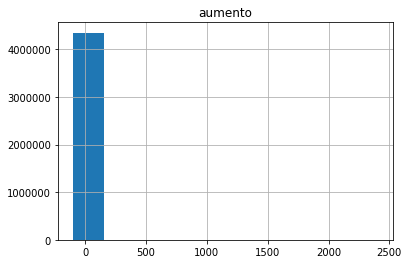

In [12]:
cruce.hist('aumento')

Obtengo un dataset sin extremos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb0dd57e80>]], dtype=object)

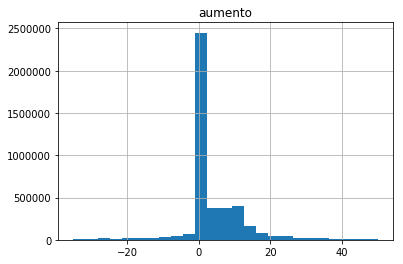

In [13]:
cruce_sin_extremos = cruce.loc[(cruce.aumento >= -35) & (cruce.aumento <= 50)]
cruce_sin_extremos.hist('aumento', bins=25)

preparo un frame de sucursales para tener detalles

In [56]:
sucs = pd.read_csv('datasets/sucursales.csv', usecols=['provincia','sucursalId', 'comercioId', 'banderaId'])
sucs['sucursal_id'] = sucs.apply(lambda x: f"{x['comercioId']}-{x['banderaId']}-{x['sucursalId']}", axis=1)
cadenas = pd.read_csv('datasets/cadenas.csv', usecols=['comercioId', 'banderaId', 'comercioRazonSocial', 'banderaDescripcion'])
cadenas.rename(dict(zip(cadenas.columns[-2:], ['empresa', 'cadena'])), inplace=True)
sucs = pd.merge(sucs, cadenas, on=['comercioId', 'banderaId'])
sucs.drop(['sucursalId', 'comercioId', 'banderaId'], axis=1)
sucs.head()

,provincia,sucursalId,comercioId,banderaId,sucursal_id,comercioRazonSocial,banderaDescripcion
0,AR-C,916,9,2,9-2-916,Jumbo Retail Argentina S.A.,Disco
1,AR-C,137,9,2,9-2-137,Jumbo Retail Argentina S.A.,Disco
2,AR-C,107,9,2,9-2-107,Jumbo Retail Argentina S.A.,Disco
3,AR-C,16,9,2,9-2-16,Jumbo Retail Argentina S.A.,Disco
4,AR-C,39,9,2,9-2-39,Jumbo Retail Argentina S.A.,Disco


In [57]:
# from https://es.wikipedia.org/wiki/ISO_3166-2:AR
text = """
AR-A	Salta
AR-B	Provincia de Buenos Aires
AR-C	Ciudad Autónoma de Buenos Aires
AR-D	San Luis
AR-E	Entre Ríos
AR-F	La Rioja
AR-G	Santiago del Estero
AR-H	Chaco
AR-J	San Juan
AR-K	Catamarca
AR-L	La Pampa
AR-M	Mendoza
AR-N	Misiones
AR-P	Formosa
AR-Q	Neuquén
AR-R	Río Negro
AR-S	Santa Fe
AR-T	Tucumán
AR-U	Chubut
AR-V	Tierra del Fuego
AR-W	Corrientes
AR-X	Córdoba
AR-Y	Jujuy
AR-Z	Santa Cruz
"""
from io import StringIO
sucs = pd.merge(sucs, cods, left_on='provincia', right_on='codigo')
sucs.drop(['provincia', 'sucursalId', 'comercioId', 'banderaId', 'codigo'], axis=1, inplace=True)
sucs.rename(columns=dict(comercioRazonSocial='empresa', banderaDescripcion='cadena', prov='provincia'), inplace=True)
sucs.head()


,sucursal_id,empresa,cadena,provincia
0,9-2-916,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
1,9-2-137,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
2,9-2-107,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
3,9-2-16,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
4,9-2-39,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires


y ahora cruzo los datos via sucursal_id

In [58]:
con_sucursales = pd.merge(cruce_sin_extremos, sucs, on='sucursal_id')
con_sucursales.head()

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento,empresa,cadena,provincia
0,7790080065183,9-2-12,22.45,22.45,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
1,7791337651227,9-2-12,22.99,23.99,4.349717,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
2,7791337690820,9-2-12,40.00,40.00,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
3,7790080065152,9-2-12,19.99,19.99,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires
4,7790080065169,9-2-12,19.99,19.99,0.000000,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires


Ahora detalles de productos

In [61]:
prods = pd.read_csv('datasets/productos.csv')
prods.head()

,nombre,marca,id,presentacion
0,Yogur Entero Firme Frutado Multinutrientes San...,YOGS,7790080065107,180.0 gr
1,Yogur Entero Firme Frutilla Sancor Yogs Pack 2...,YOGS,7790080065183,250.0 gr
2,Yogur Entero Firme Frutilla Yogurisimo 190 Gr,YOGURISIMO,7791337651227,190.0 gr
3,Yogur Entero Firme Frutilla Yogurisimo 4 Un 50...,YOGURISIMO,7791337690820,500.0 gr
4,Yogur Entero Firme Multinutrientes Frambuesa M...,YOGS,7790080065121,180.0 gr


Tengo otros datasets del proyecto preciosa para aumentar detalles de marcas de productos: fabricante y categoria. 

La estructura de datos de Preciosa era más compleja y tenia categorias de productos con un gran detalle de subcategorias. El modelo está basado en [django-treebeard](http://django-treebeard.readthedocs.io/en/latest/). Nosotros necesitamos aplanar el arbol para usar categorias más generales. 

In [66]:
categorias = pd.read_csv('datasets/preciosa_categoria.csv')
categorias.head()

,id,path,depth,numchild,nombre,oculta,busqueda
0,2,0003,1,23,Almacen,f,almacen
1,3,00030001,2,6,Aceites,f,almacen aceites
2,4,00030002,2,4,Aceitunas y encurtidos,f,almacen aceitunas y encurtidos
3,5,00030003,2,6,Arroz,f,almacen arroz
4,6,00030004,2,2,Azucar y edulcorante,f,almacen azucar y edulcorante


In [89]:
fino = pd.merge(pd.read_csv('datasets/preciosa_productos.csv', usecols=['upc', 'categoria_id']), categorias[['id', 'path']], left_on='categoria_id', right_on='id')
fino['cat_principal'] = fino.path.str[:4]   
fino['cat_secundaria'] = fino.path.str[:8]   
fino.drop(['categoria_id', 'id', 'path'], axis=1, inplace=True)
con_principal = pd.merge(fino, categorias[['path', 'nombre']], left_on='cat_principal', right_on='path').drop('cat_principal', axis=1).rename(columns={'nombre': 'cat_principal'})
con_secundaria = pd.merge(con_principal, categorias[['path', 'nombre']], left_on='cat_secundaria', right_on='path').drop(['path_x', 'path_y', 'cat_secundaria'], axis=1).rename(columns={'nombre': 'cat_secundaria'})
con_secundaria.head()


,upc,cat_principal,cat_secundaria
0,693149611142,Automotor,Accesorios
1,779725000223,Automotor,Accesorios
2,779725000224,Automotor,Accesorios
3,693149773301,Automotor,Accesorios
4,693149864321,Automotor,Accesorios


In [92]:
con_secundaria.upc = con_secundaria.upc.astype(str)

In [140]:
prods_con_categoria = pd.merge(prods, con_secundaria, how='left', left_on='id', right_on='upc').drop('upc', axis=1)
prods_con_categoria

,nombre,marca,id,presentacion,cat_principal,cat_secundaria
0,Yogur Entero Firme Frutado Multinutrientes San...,YOGS,7790080065107,180.0 gr,NaN,NaN
1,Yogur Entero Firme Frutilla Sancor Yogs Pack 2...,YOGS,7790080065183,250.0 gr,NaN,NaN
2,Yogur Entero Firme Frutilla Yogurisimo 190 Gr,YOGURISIMO,7791337651227,190.0 gr,NaN,NaN
3,Yogur Entero Firme Frutilla Yogurisimo 4 Un 50...,YOGURISIMO,7791337690820,500.0 gr,NaN,NaN
4,Yogur Entero Firme Multinutrientes Frambuesa M...,YOGS,7790080065121,180.0 gr,NaN,NaN
5,Yogur Entero Firme Multinutrientes Frutal Sanc...,YOGS,7790080065152,190.0 gr,NaN,NaN
6,Yogur Entero Firme Multinutrientes Vainilla Sa...,YOGS,7790080065169,190.0 gr,NaN,NaN
7,Yogur Entero Firme Vainilla Sancor Yogs Pack 2...,YOGS,7790080065190,250.0 gr,NaN,NaN
8,Yogur Entero Firme Vainilla Yogurisimo 190 Gr,YOGURISIMO,7791337601215,190.0 gr,NaN,NaN
9,Yogur Entero Fortificado Vainilla Yogurisimo P...,YOGURISIMO,7791337690813,500.0 gr,NaN,NaN


In [141]:
categorias = prods_con_categoria.cat_principal.drop_duplicates()[1:]
categorias

18                      Almacen
38                   Perfumeria
59          Bebidas sin alcohol
73                     Limpieza
215                     Lacteos
340         Bebidas con alcohol
903                  Fiambreria
1009             Pastas y tapas
1322                 Congelados
1573              Mamas y bebes
2439     Golosinas y galletitas
5249                   Farmacia
5330                   Mascotas
6386                  Panaderia
11301         Frutas y verduras
Name: cat_principal, dtype: object

Como vemos, el cruce arrojo pocas coincidencias, es decir, que nos quedan muchisimos productos sin clasificar por categoria. Voy a hacer una inferencia baado en la categorización de productos conocidos. 

La idea es la siguiente:
 
 - obtengo la primer palabra del nombre de cada producto asociado a una categoria principal conocida. Ejemplo, para "Lacteos" arrojará ('Yogur', 'Leche', 'Manteca', ... )  
 - luego filtro productos no categorizados que comiencen con alguna de esas palabras y asigno la categoria


In [142]:
for cat in categorias[::-1]:
    descriptores = tuple(prods_con_categoria.loc[prods_con_categoria.cat_principal == cat].nombre.str.partition(' ')[0].drop_duplicates().tolist())
    prods_con_categoria.loc[prods_con_categoria.nombre.str.startswith(descriptores) & prods_con_categoria.cat_principal.isnull(), 'cat_principal'] = cat


In [154]:
prods_con_categoria.rename(columns={'id': 'producto_id'}, inplace=True)

In [155]:
prods_con_categoria.head()

,nombre,marca,producto_id,presentacion,cat_principal,cat_secundaria
0,Yogur Entero Firme Frutado Multinutrientes San...,YOGS,7790080065107,180.0 gr,Lacteos,NaN
1,Yogur Entero Firme Frutilla Sancor Yogs Pack 2...,YOGS,7790080065183,250.0 gr,Lacteos,NaN
2,Yogur Entero Firme Frutilla Yogurisimo 190 Gr,YOGURISIMO,7791337651227,190.0 gr,Lacteos,NaN
3,Yogur Entero Firme Frutilla Yogurisimo 4 Un 50...,YOGURISIMO,7791337690820,500.0 gr,Lacteos,NaN
4,Yogur Entero Firme Multinutrientes Frambuesa M...,YOGS,7790080065121,180.0 gr,Lacteos,NaN


In [157]:

data = pd.merge(con_sucursales, prods_con_categoria[['producto_id', 'marca', 'cat_principal']], on='producto_id')
data.head()

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento,empresa,cadena,provincia,marca,cat_principal
0,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
1,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
2,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
3,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos
4,7790080065183,9-2-12,22.45,22.45,0.0,Jumbo Retail Argentina S.A.,Disco,Ciudad Autónoma de Buenos Aires,YOGS,Lacteos


In [158]:
data.to_csv('dataset_abril_mayo.csv', index=False)

# Analisis de precios


## Aumentos por marca

In [1]:
import pandas as pd
import numpy as np

In [2]:
por_marca = pd.read_csv('dataset_abril_mayo.csv', usecols=['marca', 'precio_mayo', 'aumento'])

In [3]:
por_marca.head()

,precio_mayo,aumento,marca
0,22.45,0.0,YOGS
1,22.45,0.0,YOGS
2,22.45,0.0,YOGS
3,22.45,0.0,YOGS
4,22.45,0.0,YOGS


Agrego fabricante desde otro dataset de Preciosa, para las marcas que tengo

In [4]:
marcas = pd.read_csv('datasets/preciosamarcas.csv', usecols=['fabricante_id', 'nombre'])
marcas.fabricante_id = marcas.fabricante_id.fillna(0).astype(int)
fabri = pd.read_csv('datasets/preciosa_fabricantes.csv', usecols=['id', 'nombre'])
fabri.rename(columns=dict(zip(fabri.columns, ['fabricante_id', 'fabricante'])), inplace=True)
marcas_preciosa = pd.merge(marcas, fabri, on='fabricante_id')
marcas_preciosa.drop('fabricante_id', axis=1, inplace=True)
marcas_preciosa.nombre = marcas_preciosa.nombre.str.upper()
marcas_preciosa.rename(columns={'nombre': 'marca'}, inplace=True)
marcas_preciosa.head()

,marca,fabricante
0,COCA COLA,Coca-Cola de Argentina
1,COCA COLA LIGHT,Coca-Cola de Argentina
2,COCA COLA ZERO,Coca-Cola de Argentina
3,COCA COLA LIFE,Coca-Cola de Argentina
4,FANTA,Coca-Cola de Argentina


In [6]:
por_marca_fab = pd.merge(por_marca, marcas_preciosa, how='left', on='marca')
por_marca_fab.loc[~por_marca_fab.fabricante.isnull()].shape[0]

5406031

le encontramos fabricantes a muchos productos!

También vamos a considerar las cantidad de productos de cada marca para evitar outliers

In [8]:
prods = pd.read_csv('datasets/productos.csv')

In [9]:
by_marca = por_marca_fab.groupby('marca').aumento.mean()
by_marca.head()

marca
 ALTO PAVO                  0.000000
 LIMPIADOR PROCENEX GEL     2.916998
 PUNT E MES                 0.207174
 SCOTCH BRITE              16.672224
006                         0.000000
Name: aumento, dtype: float64

In [10]:
marcas_cant_prods = prods.groupby('marca').count()
marcas_cant_prods.head()

,nombre,id,presentacion
marca,,,
ALTO PAVO,5,5,5
LIMPIADOR PROCENEX GEL,3,3,3
PUNT E MES,7,7,7
SCOTCH BRITE,3,3,3
006,6,6,6


construyo el frame con aumentos por marca, cant_productos

In [11]:
por_marcas = by_marca.to_frame('aumento').join(marcas_cant_prods.id.to_frame('cantidad_prods'))
por_marcas.head()

,aumento,cantidad_prods
marca,,
ALTO PAVO,0.000000,5
LIMPIADOR PROCENEX GEL,2.916998,3
PUNT E MES,0.207174,7
SCOTCH BRITE,16.672224,3
006,0.000000,6


Analicemos cantidad de productos por marca

In [12]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f266760eba8>]], dtype=object)

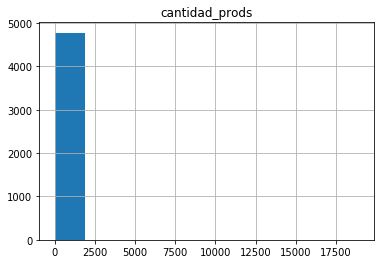

In [13]:
por_marcas.hist('cantidad_prods')

Se observa que hay muchos outliers, marcas que tienen una enorme cantidad de productos. 

In [14]:
por_marcas.sort_values('cantidad_prods').tail()

,aumento,cantidad_prods
marca,,
LA ANONIMA,4.349845,2641
PRIMER PRECIO,-2.637383,2952
DIA,2.478265,4927
CARREFOUR,11.049033,6521
SIN MARCA,0.923425,18919


Podemos filtrar las marcas con muchos productos en góndola que más aumentaron. Son tipicamente las marcas propias de los supermercados. 

In [17]:
marcas_multiprod = por_marcas.loc[(por_marcas['cantidad_prods'] > 1000) & (por_marcas['aumento'] > 4)].sort_values('aumento', ascending=False)
marcas_multiprod

,aumento,cantidad_prods
marca,,
CARREFOUR,11.049033,6521
COTO,7.428029,1329
SEDAL,7.282557,1283
JUMBO,5.861408,2045
DOVE,5.646460,1437
GLADE,5.277961,2193
LA ANONIMA,4.349845,2641
COLGATE,4.212874,1190
GREAT VALUE,4.120198,1426


Los **productos propios de Carrefour** aumentaron 11.10% en promedio en 1 mes. 

In [18]:
por_marcas.cantidad_prods.describe()

count     4781.000000
mean        48.513491
std        322.609651
min          1.000000
25%          5.000000
50%         10.000000
75%         32.000000
max      18919.000000
Name: cantidad_prods, dtype: float64

In [19]:
por_marcas.cantidad_prods.median()

10.0

Para analizar marcas representativas del mercado voy a usar dos criterios. 
- marcas que tengan más de 12 productos en góndola
- marcas para los que haya relevado al menos 5000 precios

In [20]:
cant_precios_por_marca = por_marca_fab.groupby('marca').count().precio_mayo.sort_values(ascending=False)
cant_precios_por_marca.head()

marca
DIA          1173826
SIN MARCA     648275
CARREFOUR     573408
NIVEA         331740
KNORR         318464
Name: precio_mayo, dtype: int64

In [21]:
por_marcas_p = por_marcas.join(cant_precios_por_marca.to_frame('cant_precios'))
por_marcas_p.head()

,aumento,cantidad_prods,cant_precios
marca,,,
ALTO PAVO,0.000000,5,50
LIMPIADOR PROCENEX GEL,2.916998,3,48
PUNT E MES,0.207174,7,1848
SCOTCH BRITE,16.672224,3,39
006,0.000000,6,84


Las 200 marcas representativas del mercado que más aumentaron

In [24]:
pd.set_option('display.max_rows', 500)  # no truncar tabla

por_marcas_p.loc[(por_marcas_p['cantidad_prods'] >= 15) & (por_marcas_p['cant_precios'] > 5000)].sort_values('aumento', ascending=False)[:200]

,aumento,cantidad_prods,cant_precios
marca,,,
DONSA,38.813772,21,5880
BACAN,29.214733,31,6713
BLANCAFLOR,28.008605,20,10376
FAVORITA,22.343750,100,32864
MENDIA,21.115760,193,10943
CASERITA,17.194304,46,9448
BARBARA,16.932044,137,9722
KELLOGGS,16.191333,83,18972
PUREZA,16.062195,63,34851


### Aumentos por fabricante

Hay que tener en cuenta que el cruce de datos entre marca y fabricante está incompleto, pero para aquellos casos que tenemos datos, los resultados son estos

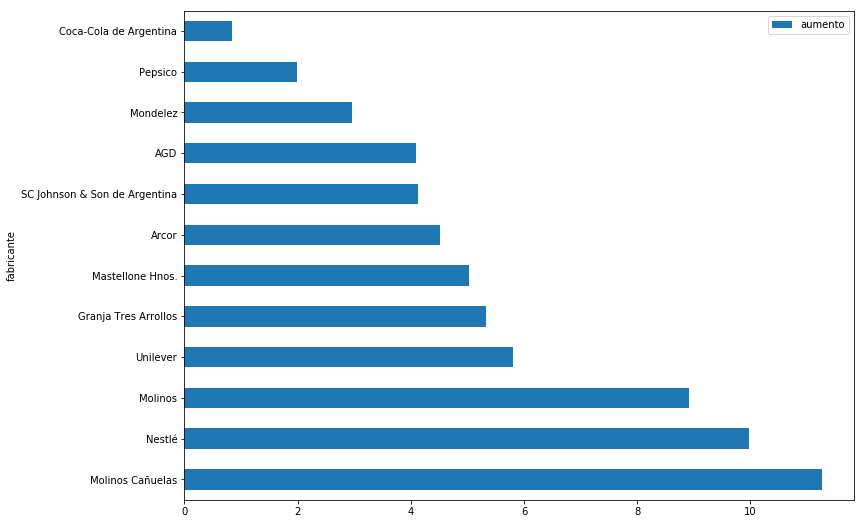

In [27]:
by_fab = por_marca_fab.groupby('fabricante').aumento.mean().to_frame('aumento').sort_values('aumento', ascending=False)
by_fab.plot.barh()

In [28]:
by_fab

,aumento
fabricante,
Molinos Cañuelas,11.265482
Nestlé,9.968634
Molinos,8.912259
Unilever,5.811112
Granja Tres Arrollos,5.324268
Mastellone Hnos.,5.020191
Arcor,4.508732
SC Johnson & Son de Argentina,4.123395
AGD,4.095034


## Aumentos por cadena

In [29]:
data = pd.read_csv('dataset_abril_mayo.csv', usecols=['cadena', 'empresa', 'precio_mayo', 'aumento'])

In [32]:
por_cadena = data.groupby('cadena').aumento.mean().to_frame('aumento')
por_cadena.sort_values('aumento', ascending=False)

,aumento
cadena,
DEHEZA S.A.I.C.F. e I.,10.694261
JOSIMAR SUPERMERCADOS,9.775400
FULL,6.583154
Vea,6.112736
Toledo,5.634286
Disco,4.210517
COTO CICSA,3.976860
Jumbo,3.976595
LA AGRICOLA REGIONAL COOPERATIVA LIMITADA,3.836806


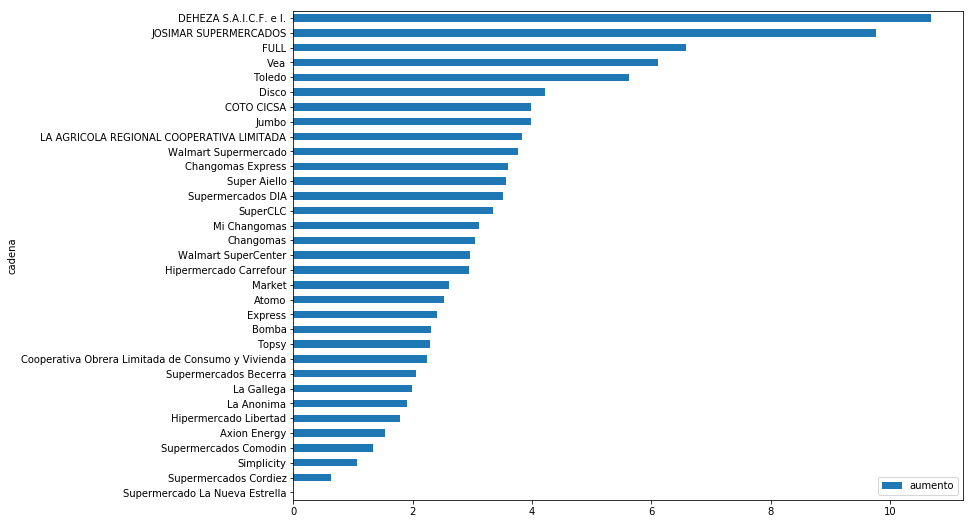

In [33]:
por_cadena.sort_values('aumento').plot.barh()

In [34]:
por_empresa = data.groupby('empresa').aumento.mean().to_frame('aumento')
por_empresa.sort_values('aumento', ascending=False)

,aumento
empresa,
Deheza S.A.I.C.F. e I.,10.694261
Josimar S.A.,9.775400
Operadora de Estaciones de Servicios S.A.,6.583154
Supermercados Toledo S.A.,5.634286
Jumbo Retail Argentina S.A.,5.244908
Coto Centro Integral de Comercialización S.A.,3.976860
La Agricola Regional Cooperativa Limitada,3.836806
Aiello Supermercados S.A.,3.561877
DIA Argentina S.A,3.511292


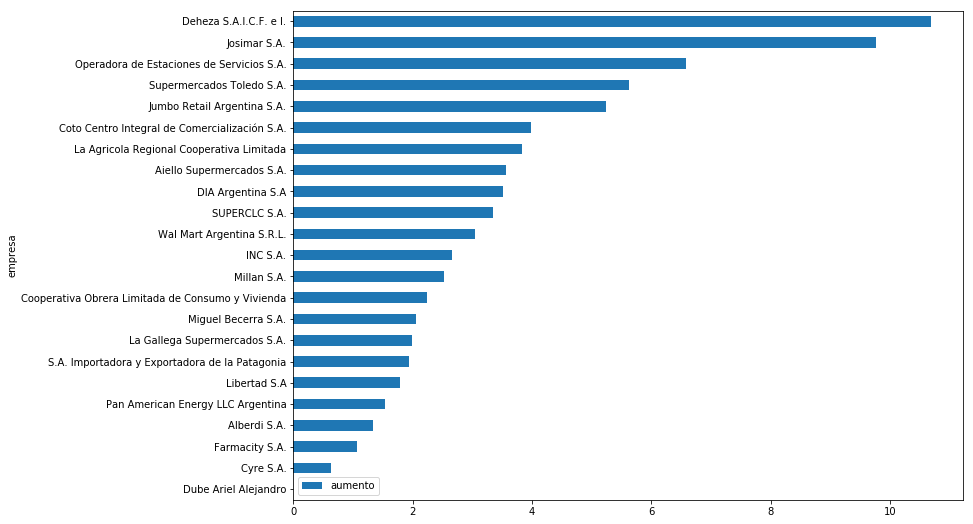

In [35]:
por_empresa.sort_values('aumento').plot.barh()

### Por provincia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)  # graficos más grandes
pd.set_option('display.max_rows', 500)  # no truncar tabla
%matplotlib inline

In [3]:
data = pd.read_csv('dataset_abril_mayo.csv', usecols=['provincia', 'aumento'])

In [4]:
por_prov = data.groupby('provincia').aumento.mean().to_frame('aumento')
por_prov.sort_values('aumento', ascending=False)

,aumento
provincia,
Mendoza,5.300424
La Rioja,4.880351
Tucumán,4.873894
Catamarca,4.672742
Santiago del Estero,4.327674
San Luis,3.999934
Entre Ríos,3.735036
Corrientes,3.477199
Provincia de Buenos Aires,3.448332


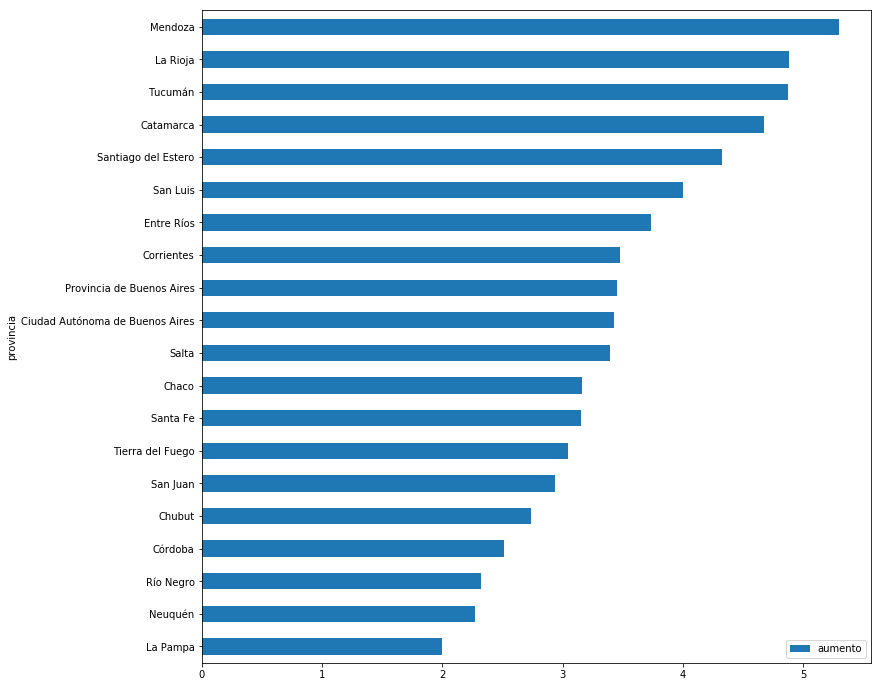

In [7]:
plt.rcParams["figure.figsize"] = (12,12)
por_prov.sort_values('aumento').plot.barh()

## Por categoria

In [8]:
data = pd.read_csv('dataset_abril_mayo.csv', usecols=['cat_principal', 'aumento'])
por_cat = data.groupby('cat_principal').aumento.mean().to_frame('aumento')
por_cat.sort_values('aumento', ascending=False)

/home/tin/.virtualenvs/curso/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,aumento
cat_principal,
Pastas y tapas,7.925621
Almacen,4.764774
Golosinas y galletitas,4.485966
Frutas y verduras,4.353244
Congelados,3.813899
Mamas y bebes,3.674466
Limpieza,3.585530
Panaderia,3.043104
Fiambreria,2.692639
